In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [27]:
date = np.linspace(1,15,15)
print(data)
#收盘价 和 开盘价
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])

plt.figure()#绘图
for i in range(0,15):
    #柱状图  使用一个一行 两列的矩阵 填入收盘价 开盘价
    dateOne = np.zeros([2])
    dateOne[0] = i
    dateOne[1] = i
    priceOne = np.zeros([2])
    priceOne[0] = endPrice[i]
    priceOne[1] = beginPrice[i]
    if endPrice[i]>beginPrice[i]:#收盘价低于开盘价 绿色 否则 红色
        plt.plot(dateOne,priceOne,'r',lw=8)
    else:
        plt.plot(dateOne,priceOne,'g',lw=8) 

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


### 搭建神经网络
    15*1  1*10 （= 15*10） 10*1 = 15*1

#### 隐藏层

In [28]:
dateNormal = np.zeros([15,1]) # 存储日期 15行 1列
priceNormal = np.zeros([15,1]) #股价
#将结果 归一化  除以不高于的数
for i in range(0,15):
    dateNormal[i,0] = i/14.0
    priceNormal[i,0] = endPrice[i]/3000.0
    
#输入值 输出值
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#权重 和 偏置项   变量  
w1 = tf.Variable(tf.random_uniform([1,10],0,1)) #初始化为 0 到 1之间的随机数
b1 = tf.Variable(tf.zeros([1,10])) #初始化为0

wb1 = tf.matmul(x,w1)+b1
layer1 = tf.nn.relu(wb1) #激活函数  相当于一种 映射


#### 输出层

In [29]:
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)

#计算loss  标准差
loss = tf.reduce_mean(tf.square(y-layer2)) 
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)  # 语句含义： 使用梯度下降法训练 步长为 0.1 目的是降低loss

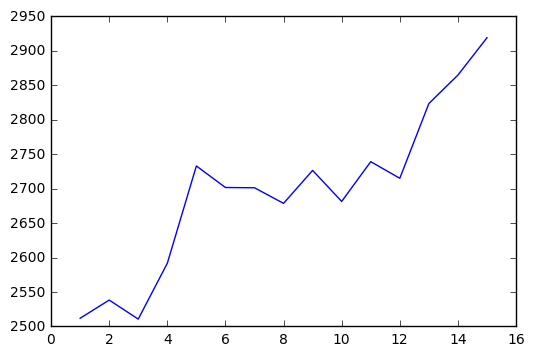

In [36]:
#训练
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10000):
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
    
    #训练结束 后 使用训练得出的参数 进行预测
    pred = sess.run(layer2,feed_dict={x:dateNormal}) #run 之后接受的变量类型 与 layer2一致
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0] = (pred*3000)[i,0]
    plt.plot(date,predPrice,'b',lw=1)
plt.show()